In [4]:
import pandas

In [5]:
# It takes time…
df = pandas.read_csv('data/SET1/SET1S_01.CSV.gz', compression='gzip', header=None)

In [66]:
df.head()

,timestamp,out,in,texts
0,2013-01-01 00,1,61,1
1,2013-01-01 00,1,340,1
2,2013-01-01 00,1,419,1
3,2013-01-01 00,1,420,1
4,2013-01-01 00,1,447,2


In [67]:
df.columns = ['timestamp', 'from', 'to', 'texts']
df.head()

,timestamp,from,to,texts
0,2013-01-01 00,1,61,1
1,2013-01-01 00,1,340,1
2,2013-01-01 00,1,419,1
3,2013-01-01 00,1,420,1
4,2013-01-01 00,1,447,2


In [68]:
len(df)

50230476

## Selecting columns

In [77]:
df.timestamp.head()

0    2013-01-01 00
1    2013-01-01 00
2    2013-01-01 00
3    2013-01-01 00
4    2013-01-01 00
Name: timestamp, dtype: object

In [78]:
df.texts.head()

0    1
1    1
2    1
3    1
4    2
Name: texts, dtype: int64

## Filtering the dataframe

In [69]:
df_first = df[df.timestamp == '2013-01-01 00']

In [70]:
len(df_first)

396520

In [16]:
outgoing_group = df_first.groupby('out')

In [17]:
outgoing_group.sum().head()

,in,texts
out,,
1,4363,10
2,169063,2747
3,49081,383
4,61159,783
5,264392,4372


In [18]:
outgoing_cells = outgoing_group.sum()['texts']

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
outgoing_cells.values

array([  10, 2747,  383, ...,   11,   35,   11])

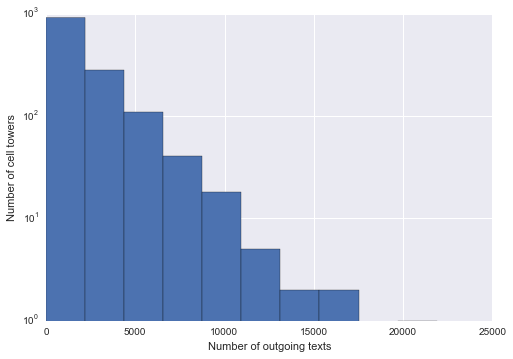

In [85]:
plt.hist(outgoing_cells.values, log=True);
plt.xlabel('Number of outgoing texts')
plt.ylabel('Number of cell towers')

In [89]:
outgoing_cells.max()

21883

In [90]:
outgoing_cells.argmax()

1041

## Map the cell towers!

In [121]:
sites = pandas.read_csv('data/ContextData/SITE_ARR_LONLAT.CSV')

In [122]:
sites.head() 

,site_id,arr_id,lon,lat
0,1,2,-17.525142,14.746832
1,2,2,-17.524360,14.747434
2,3,2,-17.522576,14.745198
3,4,2,-17.516398,14.746730
4,5,2,-17.512870,14.740658


In [123]:
sites = sites.set_index('site_id')
sites.head()

,arr_id,lon,lat
site_id,,,
1,2,-17.525142,14.746832
2,2,-17.524360,14.747434
3,2,-17.522576,14.745198
4,2,-17.516398,14.746730
5,2,-17.512870,14.740658


In [124]:
sites['outgoing_texts'] = outgoing_cells
sites.head()

,arr_id,lon,lat,outgoing_texts
site_id,,,,
1,2,-17.525142,14.746832,10
2,2,-17.524360,14.747434,2747
3,2,-17.522576,14.745198,383
4,2,-17.516398,14.746730,783
5,2,-17.512870,14.740658,4372


In [151]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.cm as cm
import numpy as np

In [57]:
points = sites[['lon', 'lat']]
vor = Voronoi(points)

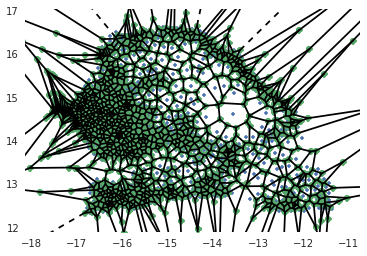

In [111]:
voronoi_plot_2d(vor);

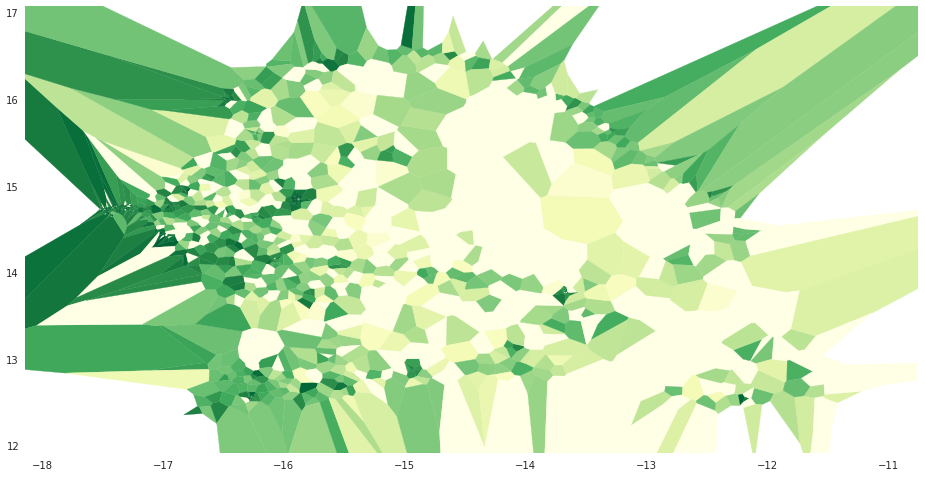

In [148]:
fig, ax = plt.subplots(figsize=(16, 8))

voronoi_plot_2d(vor, ax=ax);
ax.lines = []

for point_id, region_id in enumerate(vor.point_region):
    site = sites.iloc[point_id]
    region = vor.regions[region_id]
    
    outgoing_txts = np.log(site.outgoing_texts ) / np.log(sites.outgoing_texts.max())
    color = cm.YlGn(outgoing_txts)
    
    if not -1 in region: # border polygon
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=color)

## Analyze the network

In [52]:
import numpy as np
import networkx as x

In [53]:
df_network = df_first.pivot(index='out', columns='in', values='texts')

In [56]:
for c in df_network.columns:
    if c not in df_network.index:
        df_network.loc[c] = [np.nan] * len(df_network.columns)

In [54]:
for c in df_network.index:
    if c not in df_network.columns:
        df_network[c] = [np.nan] * len(df_network.index)

In [92]:
G = nx.DiGraph()

In [96]:
G.add_weighted_edges_from(df_first[['from', 'to', 'texts']].values)

In [102]:
G.degree()

{1: 18,
 2: 851,
 3: 272,
 4: 428,
 5: 1162,
 6: 773,
 8: 970,
 9: 1274,
 10: 952,
 11: 776,
 12: 892,
 13: 579,
 14: 1383,
 15: 1027,
 16: 1254,
 17: 1050,
 19: 1091,
 21: 815,
 22: 848,
 23: 885,
 24: 1288,
 25: 712,
 26: 1016,
 27: 508,
 28: 1590,
 29: 1210,
 30: 933,
 31: 1239,
 32: 1133,
 33: 894,
 34: 1172,
 35: 798,
 36: 854,
 37: 558,
 39: 810,
 40: 1176,
 41: 462,
 42: 942,
 44: 757,
 45: 1052,
 46: 1172,
 47: 1108,
 48: 961,
 49: 743,
 50: 1382,
 51: 1365,
 52: 1219,
 53: 53,
 55: 1016,
 56: 1300,
 57: 1307,
 58: 1195,
 59: 464,
 60: 1192,
 61: 1146,
 62: 17,
 63: 1243,
 65: 961,
 66: 693,
 67: 909,
 68: 1025,
 69: 1235,
 70: 830,
 71: 1032,
 72: 1406,
 73: 1355,
 74: 516,
 75: 1034,
 76: 790,
 77: 1553,
 78: 1427,
 79: 977,
 80: 1475,
 81: 1326,
 82: 1293,
 83: 1130,
 84: 1249,
 85: 855,
 86: 888,
 87: 1104,
 88: 1265,
 89: 1094,
 90: 1031,
 91: 549,
 92: 1240,
 93: 1306,
 94: 916,
 95: 1433,
 96: 1312,
 97: 930,
 98: 842,
 99: 1204,
 100: 1202,
 101: 1091,
 102: 1041,
 104:

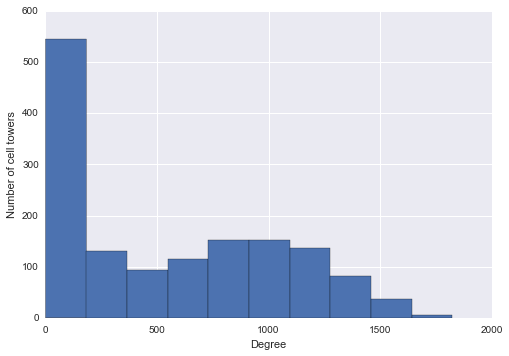

In [118]:
plt.hist(G.degree().values())
plt.xlabel('Degree')
plt.ylabel('Number of cell towers');

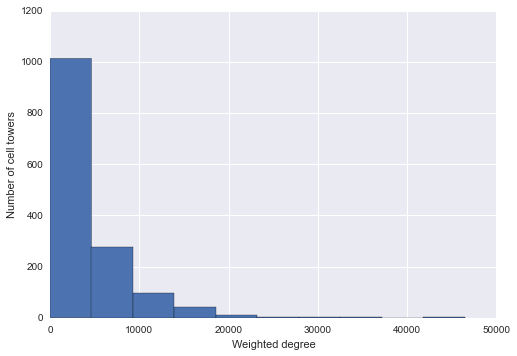

In [119]:
plt.hist(G.degree(weight='weight').values())
plt.xlabel('Weighted degree')
plt.ylabel('Number of cell towers');